In this notebook we will explore the three methods and compare their results with a multiple liear regression model applied to our synthetic data generated from the following true model f(x)

$$
y=f(x)=x+2x^2-3x^3+\epsilon
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df=pd.read_csv('Regularization_synthetic.csv')

In [4]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


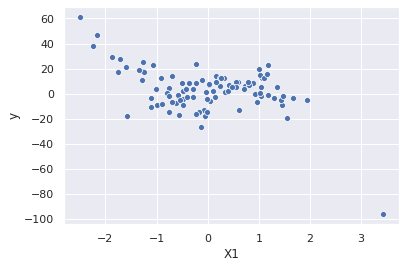

In [5]:
sns.scatterplot(x='X1', y='y', data=df)
plt.show()

**important**: we need to normalize the features before training the models.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [8]:
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


In [11]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


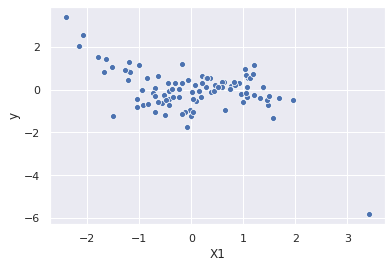

In [12]:
sns.scatterplot(x='X1', y='y', data=df_sc)
plt.show()

### Splitting the data

In [13]:
y = df_sc['y']
X = df_sc.drop('y', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


In [14]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [16]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.28e-08
Time:                        04:32:22   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A) Training the models

In this section we will train 4 different models:

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [17]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [18]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)

In [19]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [20]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


### coefficients

In [21]:
df.drop('y', axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [22]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


### Performance in the test set¶


In [23]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [24]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [25]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [26]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha


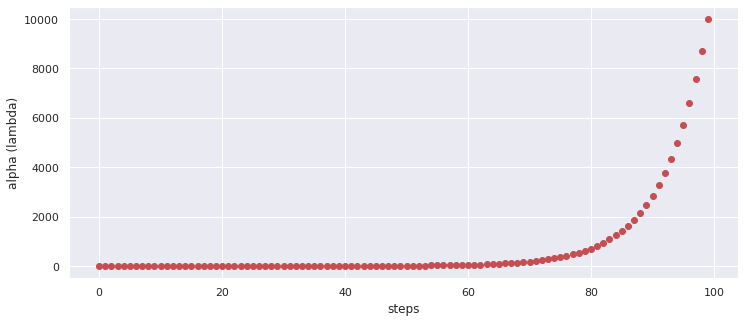

In [27]:
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [28]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 5)

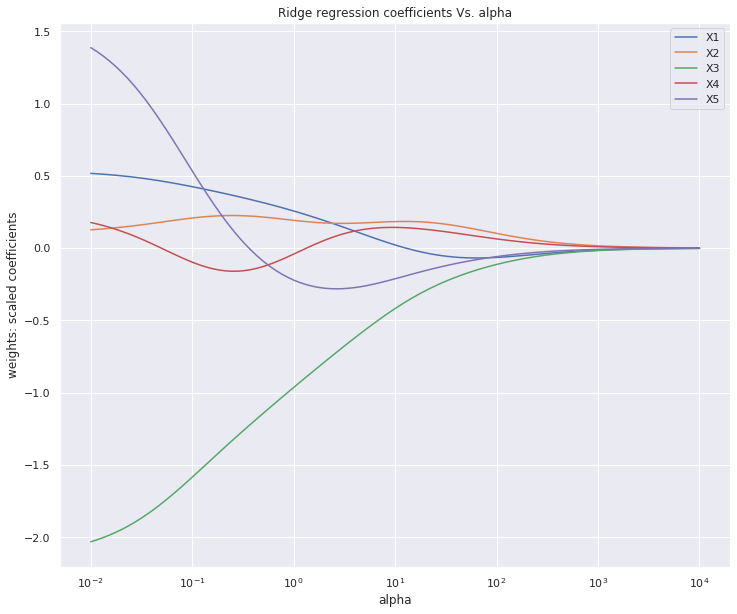

In [29]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

#### 2) Lasso regression coefficients vs alpha


In [30]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [31]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 5)

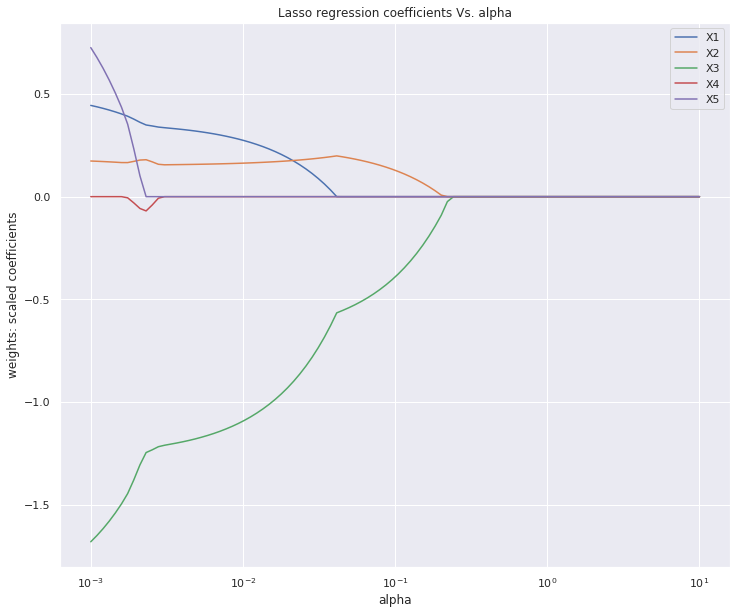

In [32]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

#### 3) ElasticNet regression coefficients vs alpha


In [33]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [34]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 5)

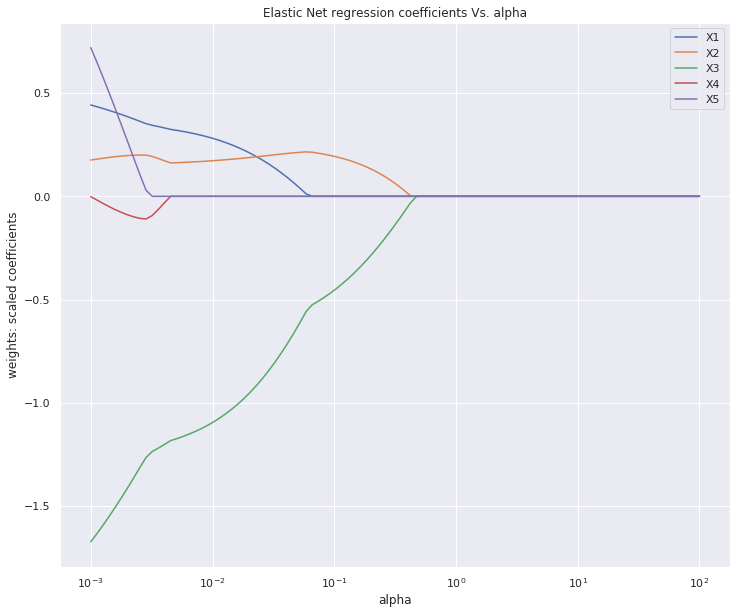

In [35]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

## Cross Validation
Let's use cross validation to find the optimal Lambdas (alphas) for different models.

#### 1) Optimal alpha for Ridge regression

In [36]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [37]:
alpha_ridge_opt = ridgecv.alpha_

--------

#### 2) Optimal alpha for Lasso regression

In [38]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.004564470133023309

In [40]:
alpha_lasso_opt = lassocv.alpha_

-----------------

#### 3) Optimal alpha for Elastic Net regression

In [41]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.006440286888331817

In [44]:
elasticnetcv.l1_ratio_

0.5

In [45]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [46]:
RMSE_CV=[]
iterator= np.arange(0.0,0.02,0.001)
for i in iterator:
    MSE = -cross_val_score(estimator = ElasticNet(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['lambda_ElasticNet'])
output['RMSE_CV']=RMSE_CV

output.head()

,lambda_ElasticNet,RMSE_CV
0,0.000,0.683684
1,0.001,0.583633
2,0.002,0.580799
3,0.003,0.578804
4,0.004,0.576902


In [48]:
output['RMSE_CV'].idxmin()

0     0.683684
1     0.583633
2     0.580799
3     0.578804
4     0.576902
5     0.575566
6     0.574839
7     0.574810
8     0.575327
9     0.576078
10    0.577111
11    0.578240
12    0.579448
13    0.580764
14    0.582210
15    0.583705
16    0.585236
17    0.586800
18    0.588397
19    0.590017
Name: RMSE_CV, dtype: float64

In [49]:
output['lambda_ElasticNet'][output['RMSE_CV'].idxmin()]

0.007

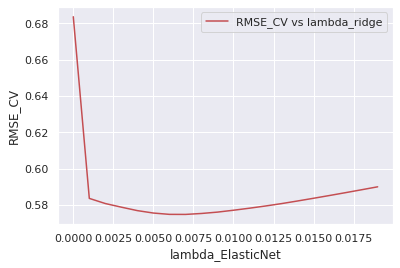

In [50]:
sns.lineplot(x='lambda_ElasticNet', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_ridge")
plt.show()

# Done!